In [7]:
import numpy as np
import pandas as pd
import networkx as nx
from dowhy import gcm
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
def bar_plot(median_attribs, 
             ylabel='Attribution Score', 
             figsize=(10, 3), 
             bwidth=0.8, 
             ylim=None,
             xticks=None, 
             xticks_rotation=90):
    fig, ax = plt.subplots(figsize=figsize)
    plt.bar(median_attribs.keys(), median_attribs.values(), ecolor='#1E88E5', color='#ff0d57', width=bwidth)
    plt.xticks(rotation=xticks_rotation)
    plt.ylabel(ylabel)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    if ylim:
        plt.ylim(ylim)
    if xticks:
        plt.xticks(list(median_attribs.keys()), xticks)
    plt.show()

In [9]:
baseline = pd.read_csv('baseline.csv')
x = pd.read_csv('x_change.csv') # add change to X
xy = pd.read_csv('xy_change.csv') # add additional change to Y

In [14]:
baseline.head()

,X,Y,Z
0,0.667947,0.825318,0.009451
1,0.689526,0.802544,0.003466
2,0.792114,0.860689,0.004349
3,0.689796,0.832464,0.005986
4,0.620337,0.798170,0.008576


In [12]:
x.head()

,X,Y,Z
0,2.417431,2.830757,0.063358
1,2.483817,2.795074,0.076599
2,2.378353,2.801189,0.067630
3,2.463062,2.744679,0.073476
4,2.419750,2.809452,0.067822


In [13]:
xy.head()

,X,Y,Z
0,2.417431,4.265543,0.089446
1,2.483817,4.273185,0.115948
2,2.378353,4.322760,0.099205
3,2.463062,4.223872,0.108261
4,2.419750,4.321224,0.100787


X                         : perc: 252.16%, diff: 1.73998, test: 2.43001, base: 0.69003
Y                         : perc: 236.49%, diff: 1.96259, test: 2.79248, base: 0.82989
Z                         : perc: 818.68%, diff: 0.06301, test: 0.07071, base: 0.00770
Y
Z
fdr_control:  fdr_bh
ordered_predecssors:  ['X'] (10000, 1)
ordered_predecssors:  ['Y'] (10000, 1)


Evaluate set function: 8it [00:00, 4271.19it/s]

fdr successes:  [0.0, 0.1543799081433136, 0.876319210866746] [ True False False]


i= 0 {'X': 0.06284026470452803, 'Y': 0.00011319479158826591, 'Z': -2.6810665450341036e-05}


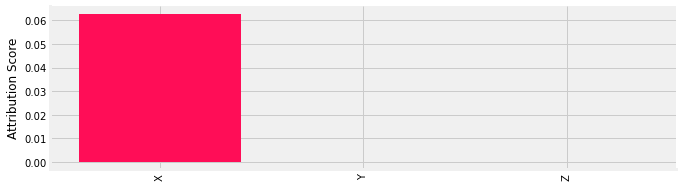

In [10]:
# Mean difference
for c in baseline.columns.to_list():
    base_mean = baseline[c].mean()
    test_mean = x[c].mean()
    print("{}: perc: {:4.2f}%, diff: {:.5f}, test: {:.5f}, base: {:.5f}"
          .format(c.ljust(26), (test_mean-base_mean)/base_mean*100, 
                  (test_mean-base_mean), test_mean, base_mean))

np.random.seed(100)

causal_graph = nx.DiGraph([('X','Y'),('Y','Z')])
causal_model = gcm.StructuralCausalModel(causal_graph)

for node in causal_graph.nodes:
    if len(list(causal_graph.predecessors(node))) > 0:
        print(node)
        causal_model.set_causal_mechanism(node, gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))
    else:
        causal_model.set_causal_mechanism(node, gcm.EmpiricalDistribution())

for i in range(1):
    np.random.seed((i+1)*100)
    attribs = gcm.distribution_change(causal_model,
                                  baseline, 
                                  x, 
                                  'Z',
            difference_estimation_func=lambda x, y: (np.mean(y) - np.mean(x))
                                 )

    print("i=", i, attribs)
    bar_plot(attribs)

X                         : perc: 252.16%, diff: 1.73998, test: 2.43001, base: 0.69003
Y                         : perc: 416.12%, diff: 3.45334, test: 4.28323, base: 0.82989
Z                         : perc: 1207.91%, diff: 0.09297, test: 0.10067, base: 0.00770
Y
Z
fdr_control:  fdr_bh
ordered_predecssors:  ['X'] (10000, 1)
ordered_predecssors:  ['Y'] (10000, 1)


Evaluate set function: 8it [00:00, 45466.71it/s]

fdr successes:  [0.0, 0.1543799081433136, 0.876319210866746] [ True False False]


i= 0 {'X': 0.06284026470452803, 'Y': 0.00011319479158826591, 'Z': -2.6810665450341036e-05}


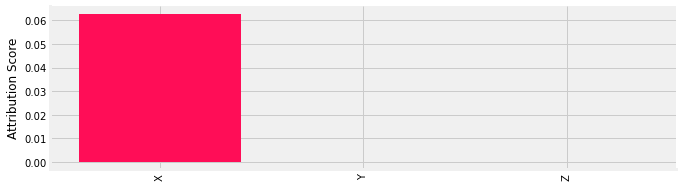

In [11]:
# Mean difference
for c in baseline.columns.to_list():
    base_mean = baseline[c].mean()
    test_mean = xy[c].mean()
    print("{}: perc: {:4.2f}%, diff: {:.5f}, test: {:.5f}, base: {:.5f}"
          .format(c.ljust(26), (test_mean-base_mean)/base_mean*100, 
                  (test_mean-base_mean), test_mean, base_mean))

np.random.seed(100)

causal_graph = nx.DiGraph([('X','Y'),('Y','Z')])
causal_model = gcm.StructuralCausalModel(causal_graph)

for node in causal_graph.nodes:
    if len(list(causal_graph.predecessors(node))) > 0:
        print(node)
        causal_model.set_causal_mechanism(node, gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))
    else:
        causal_model.set_causal_mechanism(node, gcm.EmpiricalDistribution())

for i in range(1):
    np.random.seed((i+1)*100)
    attribs = gcm.distribution_change(causal_model,
                                  baseline, 
                                  x, 
                                  'Z',
            difference_estimation_func=lambda x, y: (np.mean(y) - np.mean(x))
                                 )

    print("i=", i, attribs)
    bar_plot(attribs)